<a href="https://colab.research.google.com/github/MuhammadRhakan/final-project/blob/main/Course_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference**
> 🌎📌 *https://www.kaggle.com/datasets/hossaingh/udemy-courses?select=Comments.csv*



In [70]:
# !pip install squarify

import kagglehub
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import plotly.express as px

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
course = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "hossaingh/udemy-courses",  #dataset handle
    "Course_info.csv" #dataset name
)

'''
time.sleep(10) #delay 10 second to ensure all data is stored
'''

course.shape

<ipython-input-3-3a1b807fddb2>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  course = kagglehub.load_dataset(


(209734, 20)

In [4]:
course.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [5]:
course_filter_lang = course[course['language'].isin({'English', 'Indonesian'})]
course_filter_lang.shape

(125501, 20)

In [6]:
course_filter_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125501 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  125501 non-null  float64
 1   title               125501 non-null  object 
 2   is_paid             125501 non-null  bool   
 3   price               125501 non-null  float64
 4   headline            125481 non-null  object 
 5   num_subscribers     125501 non-null  float64
 6   avg_rating          125501 non-null  float64
 7   num_reviews         125501 non-null  float64
 8   num_comments        125501 non-null  float64
 9   num_lectures        125501 non-null  float64
 10  content_length_min  125501 non-null  float64
 11  published_time      125501 non-null  object 
 12  last_update_date    125374 non-null  object 
 13  category            125501 non-null  object 
 14  subcategory         125501 non-null  object 
 15  topic               124938 non-null  ob

In [7]:
#check unique values for each column
print(course_filter_lang.nunique().reset_index().set_axis(['Features', 'Unique Values'], axis=1).to_markdown(tablefmt='outline'))

+----+--------------------+-----------------+
|    | Features           |   Unique Values |
+====+====================+=================+
|  0 | id                 |          125501 |
|  1 | title              |          124497 |
|  2 | is_paid            |               2 |
|  3 | price              |             161 |
|  4 | headline           |          121424 |
|  5 | num_subscribers    |           18370 |
|  6 | avg_rating         |            5573 |
|  7 | num_reviews        |            4321 |
|  8 | num_comments       |            1734 |
|  9 | num_lectures       |             643 |
| 10 | content_length_min |            2763 |
| 11 | published_time     |          125433 |
| 12 | last_update_date   |            3511 |
| 13 | category           |              13 |
| 14 | subcategory        |             130 |
| 15 | topic              |            3743 |
| 16 | language           |               2 |
| 17 | course_url         |          125501 |
| 18 | instructor_name    |       

In [44]:
#check duplicates
def duplicate_check(data):
  print("\n📌 Checking for Duplicate Values")
  print("-" * 45)

  duplicated_rows = data.duplicated().sum()
  if data.duplicated().any():
    print("\n⚠️ Duplicate values found! Cleaning up...")
    print("🔄 Removing duplicates...")
    data = data.drop_duplicates()
    print(f"✅ Done! {duplicated_rows} duplicates have been removed.\n")
  else:
    print("\n✅ No duplicate values found. Data is clean!\n")

  print("-" * 45)

  return data

course_no_duplicate = duplicate_check(course_filter_lang)


📌 Checking for Duplicate Values
---------------------------------------------

✅ No duplicate values found. Data is clean!

---------------------------------------------


In [9]:
#check missing values
def missing_values_check(data):
  print("\n📌 Checking for Missing Values")
  print("🔄 Showing missing values...\n")

  percentage = (data.isnull().sum() / data.shape[0]) * 100
  missing_values = pd.DataFrame({
      'Features': data.columns,
      'Missing Values': data.isnull().sum(),
      'Percentage': [f'{round(value,2)}%' for value in percentage]
      })
  missing_values.reset_index(drop=True, inplace=True)

  print(missing_values.to_markdown(tablefmt='pipe', index=False))
  print(f'\nData Shape:  {data.shape}')

missing_values_check(course_no_duplicate)


📌 Checking for Missing Values
🔄 Showing missing values...

| Features           |   Missing Values | Percentage   |
|:-------------------|-----------------:|:-------------|
| id                 |                0 | 0.0%         |
| title              |                0 | 0.0%         |
| is_paid            |                0 | 0.0%         |
| price              |                0 | 0.0%         |
| headline           |               20 | 0.02%        |
| num_subscribers    |                0 | 0.0%         |
| avg_rating         |                0 | 0.0%         |
| num_reviews        |                0 | 0.0%         |
| num_comments       |                0 | 0.0%         |
| num_lectures       |                0 | 0.0%         |
| content_length_min |                0 | 0.0%         |
| published_time     |                0 | 0.0%         |
| last_update_date   |              127 | 0.1%         |
| category           |                0 | 0.0%         |
| subcategory        |      

In [45]:
def remove_null(data):
  clean = data.dropna()
  print(f'Data after cleaning:  {clean.shape}')

  return clean

course_dropna = remove_null(course_no_duplicate)

Data after cleaning:  (124396, 20)


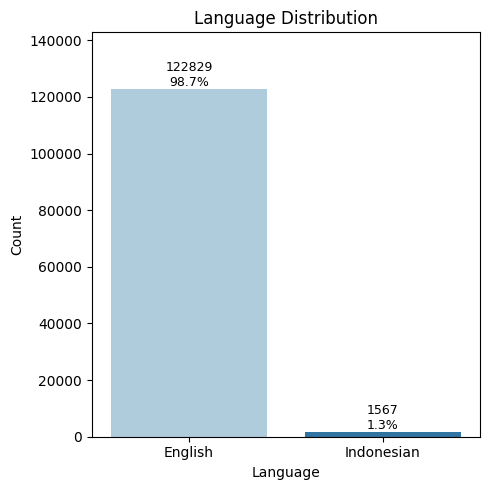

In [40]:
#check language distribution
def language_distribution(data, lang):
  plt.figure(figsize=(5,5))
  graph = sns.countplot(x=lang, data=data, width=0.8, palette='Paired', hue=lang, legend=False)

  for bar in graph.patches:
      count = int(bar.get_height())
      percentage = (count / len(data)) * 100
      label = f"{count}\n{percentage:.1f}%"
      graph.annotate(label,
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom', fontsize=9)

  plt.title('Language Distribution')
  plt.xlabel('Language')
  plt.ylabel('Count')
  plt.ylim(0, max(data[lang].value_counts()) + 20000)

  plt.tight_layout()
  plt.show()

language_distribution(course_dropna, 'language')

In [12]:
 #define categorical and numerical attributes
 def attributes(data, to_move):
  categorical = []
  print(f"Categorical Attributes:")
  for i, cat in enumerate(data.select_dtypes(include = ['object', 'bool']).columns.values):
    categorical.append(cat)
    print(f"{i+1}. {cat}")
  categorical.append(to_move)
  print(f"{len(categorical)}. {to_move}")  # manually print it

  numerical = []
  print(f"\nNumerical Attributes:")
  for i, num in enumerate(data.select_dtypes(include = 'number').drop(columns='id').columns.values):
    if num != to_move:
      numerical.append(num)
      print(f"{i+1}. {num}")

  return categorical, numerical

categorical, numerical = attributes(course_dropna, 'avg_rating')

Categorical Attributes:
1. title
2. is_paid
3. headline
4. published_time
5. last_update_date
6. category
7. subcategory
8. topic
9. language
10. course_url
11. instructor_name
12. instructor_url
13. avg_rating

Numerical Attributes:
1. price
2. num_subscribers
4. num_reviews
5. num_comments
6. num_lectures
7. content_length_min


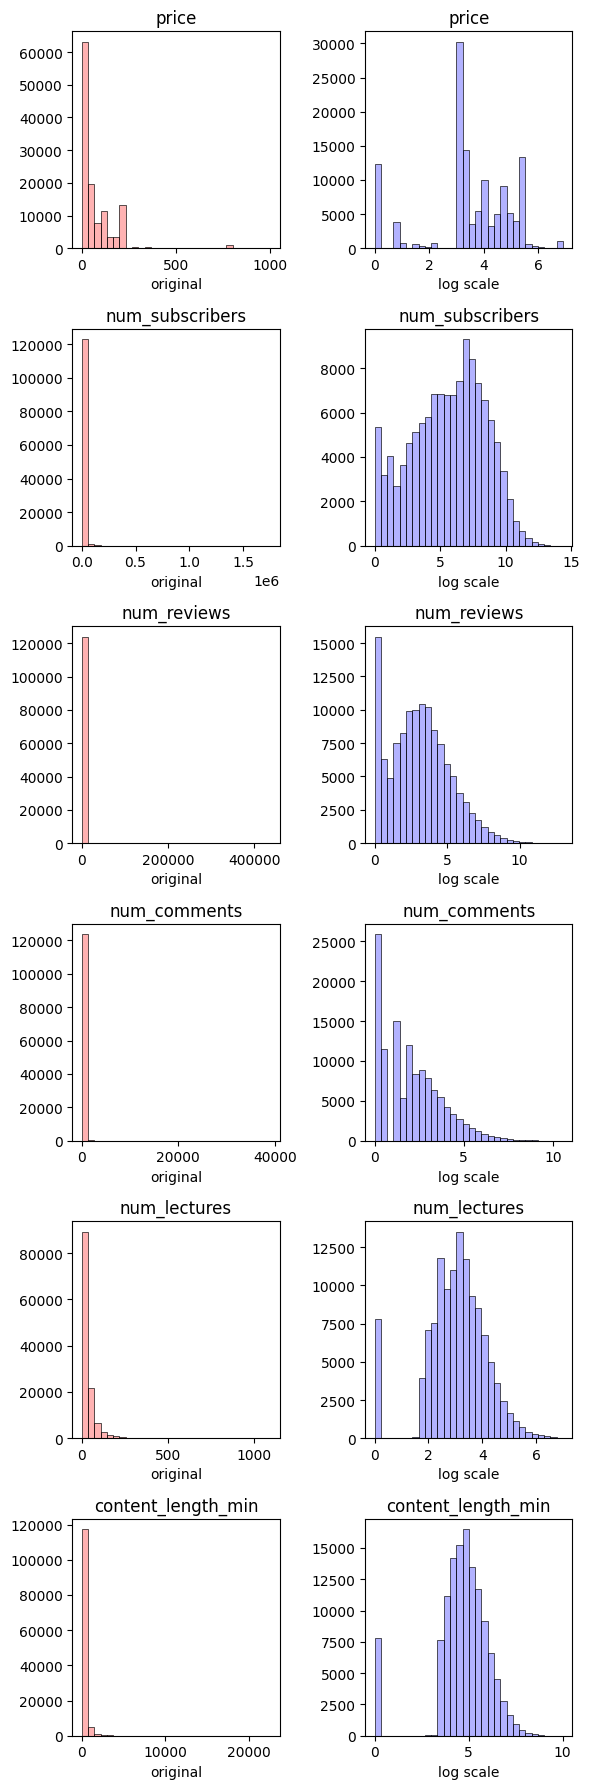

In [13]:
def histogram(data, numeric):
  fig, ax = plt.subplots(len(numeric), 2, figsize=(6,3*len(numeric)))
  for i, col in enumerate(numeric):
    sns.histplot(data[col].dropna(), ax=ax[i,0], color='red', alpha=0.3, bins=30, kde=False)
    ax[i,0].set_title(f"{col}")
    ax[i,0].set_xlabel('original')
    ax[i,0].set_ylabel('')

    sns.histplot(np.log1p(data[col].dropna()), ax=ax[i,1], color='blue', alpha=0.3, bins=30, kde=False)
    ax[i,1].set_title(f"{col}")
    ax[i,1].set_xlabel('log scale')
    ax[i,1].set_ylabel('')

  plt.tight_layout()
  plt.show()

histogram(course_dropna, numerical)

In [14]:
def trimming(data, features, alpha=0.1):
  outliers_indices = set()

  for column in features:
    pr_max = data[column].quantile(0.9)
    pr_min = data[column].quantile(0.1)

    inside = data[(data[column] >= pr_min) & (data[column] <= pr_max)]
    outside = data[(data[column] < pr_min) | (data[column] > pr_max)]

    '''
    print(f'\033[1m{column}\033[0m')
    print(f'Inside the Range  : {len(inside)}')
    print(f'Outside the Range : {len(outside)}\n')
    '''
    outliers_indices.update(outside.index)

  clean = data.drop(index=outliers_indices)

  '''
  print(f'Length Original: {data.shape[0]}')
  print(f'Length After Trim: {clean.shape[0]}')
  print(f'Trimming Ratio: {round(((len(data)-len(clean))/len(data))*100,2)}%')
  '''

  return clean

In [ ]:
course_dropna.head()

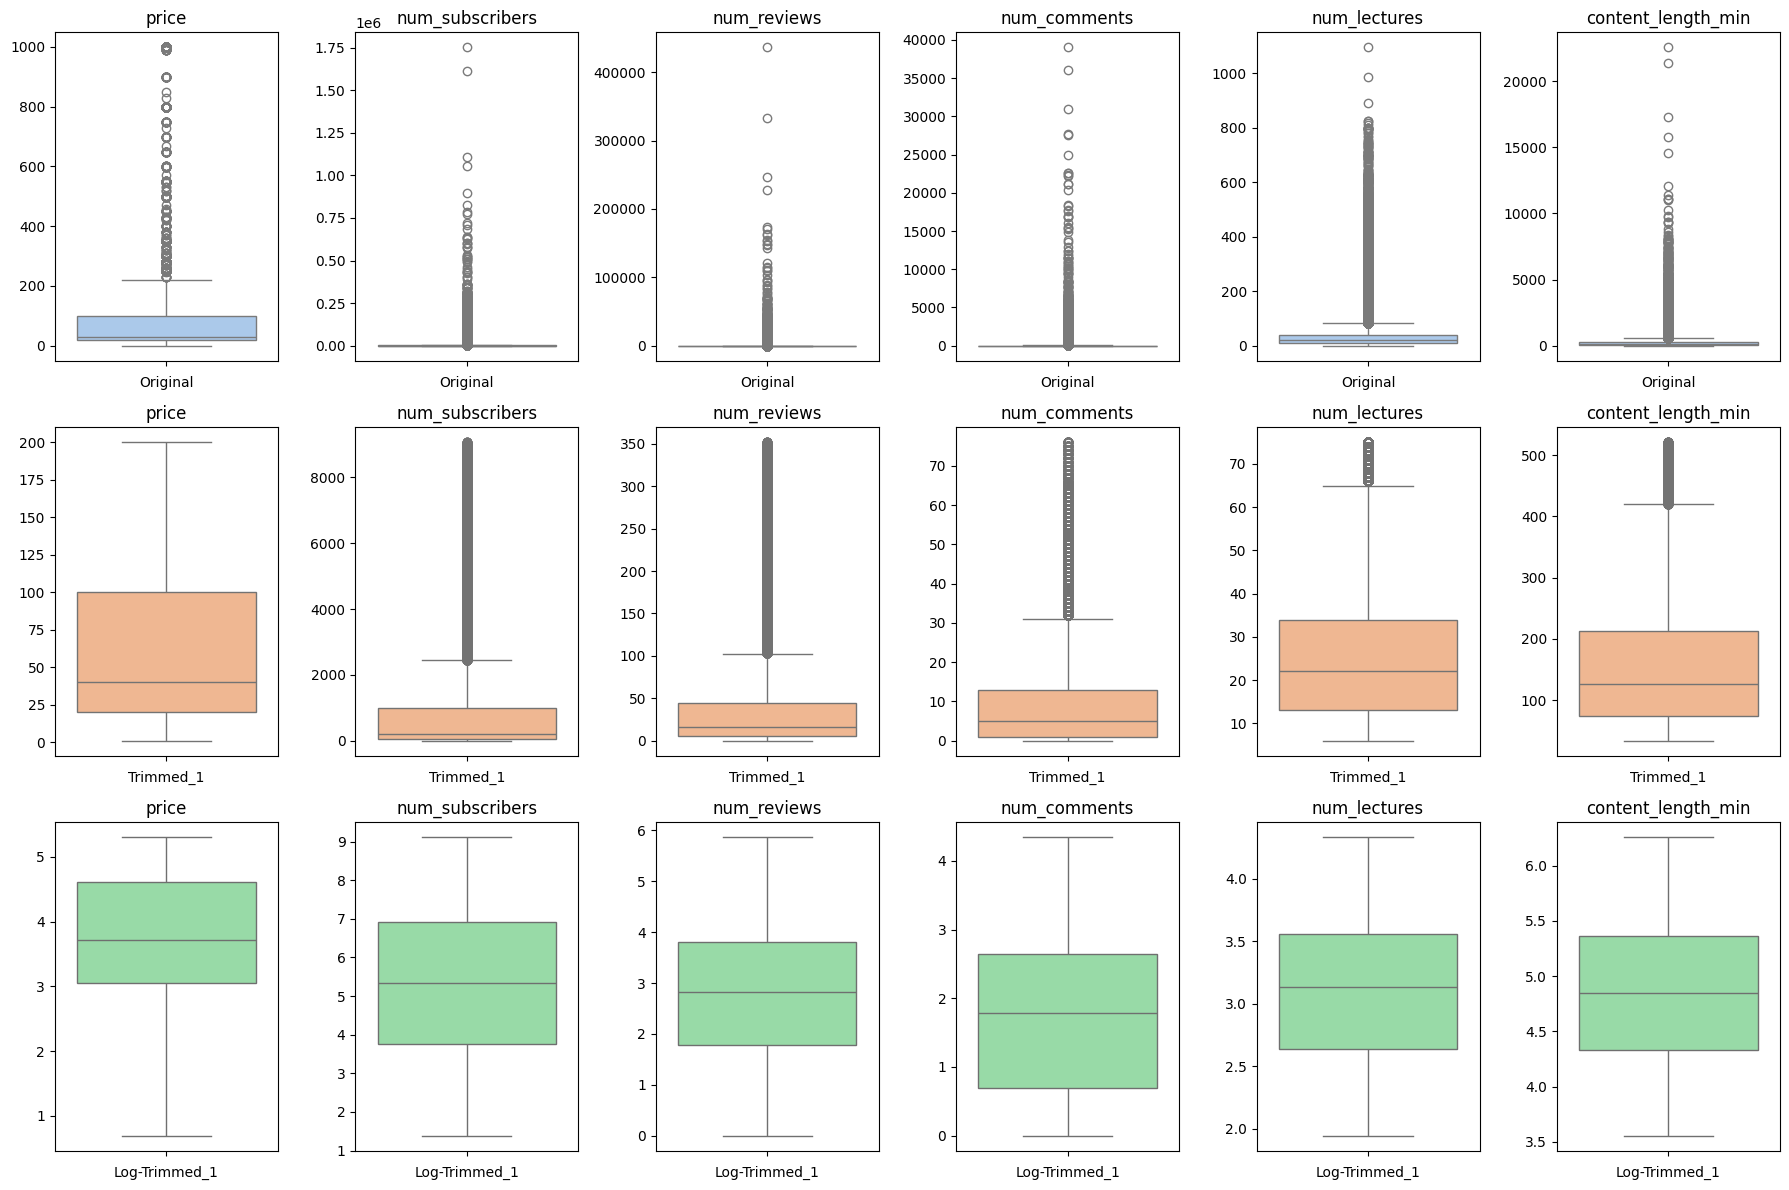


®️ Original  : 124396
✂️ After Trim  : 62955
⚖️ Elimination Ratio: 49.39%
📐 Data Shape  : (62955, 20) 


In [80]:
def outliers_handling(data, features):
  trimmed = trimming(data, features)
  log_trimmed = np.log1p(trimmed[features])

  dataset = {'Original': data, 'Trimmed_1': trimmed, 'Log-Trimmed_1': log_trimmed}

  rows = len(dataset)
  cols = len(features)
  colors = sns.color_palette("pastel", n_colors=len(dataset))

  fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
  for i, (key,values) in enumerate(dataset.items()):
    for j, col in enumerate(features):
      sns.boxplot(y=dataset[key][col], ax=ax[i][j], color=colors[i])
      ax[i][j].set_title(col)
      ax[i][j].set_xlabel(key)
      ax[i][j].set_ylabel('')

  plt.tight_layout()
  plt.show()

  print(f'\n®️ Original  : {len(data)}')
  print(f'✂️ After Trim  : {len(trimmed)}')
  print(f'⚖️ Elimination Ratio: {round(((len(data)-len(trimmed))/len(data))*100,2)}%')

  trimmed.loc[:,features] = log_trimmed
  print(f'📐 Data Shape  : {trimmed.shape} ')

  return trimmed

course_trim_outliers = outliers_handling(course_dropna, numerical)

In [16]:
def outliers_cumulative_trimming(data, features, alpha=0.1):
    length = len(features)
    trim = data.copy()

    # Original
    fig, ax = plt.subplots(1, length, figsize=(length * 3, 4))
    fig.suptitle('Original', fontsize=14)

    for a, col in enumerate(features):
        sns.boxplot(data[col], ax=ax[a], color='skyblue')
        ax[a].set_title(col)
        ax[a].set_xlabel('')
        ax[a].set_ylabel('')

    plt.tight_layout()
    plt.show()

    for i, column in enumerate(features, 1):
        # Trimming step
        pr_max = trim[column].quantile(1 - alpha)
        pr_min = trim[column].quantile(alpha)
        trim = trim[(trim[column] >= pr_min) & (trim[column] <= pr_max)]

        # Visualize trimmed data
        fig, ax = plt.subplots(1, length, figsize=(length * 3, 4))
        fig.suptitle(f'Trim of {column}', fontsize=14)

        for j, col in enumerate(features):
            sns.boxplot(trim[col], ax=ax[j], color='salmon')
            ax[j].set_title(col)
            ax[j].set_xlabel('')
            ax[j].set_ylabel('')

        plt.tight_layout()
        plt.show()

        # Visualize log-scaled trimmed data
        fig, ax = plt.subplots(1, length, figsize=(length * 3, 4))
        fig.suptitle(f'Log-Scaled after trimming {column}', fontsize=14)

        for k, col in enumerate(features):
            log_col = np.log1p(trim[col])
            sns.boxplot(log_col, ax=ax[k], color='wheat')
            ax[k].set_title(f'{col}')
            ax[k].set_xlabel(f'log1p({col})')
            ax[k].set_ylabel('')

        plt.tight_layout()
        plt.show()

        print(f"After trimming '{column}', remaining records: {len(trim)}")
        print(f'Data Loss: {len(data) - len(trim)}')
        print(f'Ratio: {((len(data) - len(trim)) / len(data) * 100):.2f}%\n')

# outliers_cumulative_trimming(course_dropna, numerical)

In [62]:
def basic_statistics(data, features=numerical):
  table = data[features].describe().T
  table['IQR'] = table['75%'] - table['25%']
  table['upper bound'] = table['75%'] + 1.5 * table['IQR']
  table['lower bound'] = table['25%'] - 1.5 * table['IQR']
  table = table.round(2)

  return table

def comparison():
  stats = {
    'Original': basic_statistics(course_dropna),
    'Trimmed': basic_statistics(trimming(course_dropna, numerical)),
    'Log_Trimmed': basic_statistics(course_trim_outliers)}

  for key,values in stats.items():
    print(f"{key}\n{values.to_markdown(tablefmt='fancy_grid')}\n")

comparison()

Original
╒════════════════════╤═════════╤═════════╤══════════╤═══════╤═══════╤════════╤═════════╤══════════════════╤═══════╤═══════════════╤═══════════════╕
│                    │   count │    mean │      std │   min │   25% │    50% │     75% │              max │   IQR │   upper bound │   lower bound │
╞════════════════════╪═════════╪═════════╪══════════╪═══════╪═══════╪════════╪═════════╪══════════════════╪═══════╪═══════════════╪═══════════════╡
│ price              │  124396 │   72.31 │   102.1  │     0 │ 19.99 │  29.99 │   99.99 │    999           │    80 │        219.99 │       -100.01 │
├────────────────────┼─────────┼─────────┼──────────┼───────┼───────┼────────┼─────────┼──────────────────┼───────┼───────────────┼───────────────┤
│ num_subscribers    │  124396 │ 4246    │ 19378.8  │     0 │ 35    │ 358    │ 2268    │      1.75236e+06 │  2233 │       5617.5  │      -3314.5  │
├────────────────────┼─────────┼─────────┼──────────┼───────┼───────┼────────┼─────────┼───────────────

In [85]:
def heatmap(data, features):
  corr = data[features].corr().round(2)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  corr_masked = corr.mask(mask)

  fig = px.imshow(
      corr_masked,
      text_auto=True,
      aspect="auto",
      color_continuous_scale="RdBu_r",
      zmin=-1,
      zmax=1)

  fig.update_layout(
      title="Feature Correlation Heatmap",
      width=800,
      height=600,
      margin=dict(l=50, r=50, t=50, b=50),
      xaxis_tickangle=0,
      font=dict(size=10))

  fig.show()

heatmap(course_trim_outliers, numerical)

In [81]:
course_trim_outliers.shape

(62955, 20)

In [88]:
def multicollinearity(data, features):
  vif_data = pd.DataFrame()
  vif_data["Feature"] = data[features].columns
  vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(data[features].shape[1])]

  print(vif_data.to_markdown(tablefmt='rounded_grid'))

multicollinearity(course_trim_outliers, numerical)

╭────┬────────────────────┬─────────╮
│    │ Feature            │     VIF │
├────┼────────────────────┼─────────┤
│  0 │ price              │ 14.3999 │
├────┼────────────────────┼─────────┤
│  1 │ num_subscribers    │ 16.0456 │
├────┼────────────────────┼─────────┤
│  2 │ num_reviews        │ 41.1184 │
├────┼────────────────────┼─────────┤
│  3 │ num_comments       │ 22.2963 │
├────┼────────────────────┼─────────┤
│  4 │ num_lectures       │ 43.9943 │
├────┼────────────────────┼─────────┤
│  5 │ content_length_min │ 48.1366 │
╰────┴────────────────────┴─────────╯


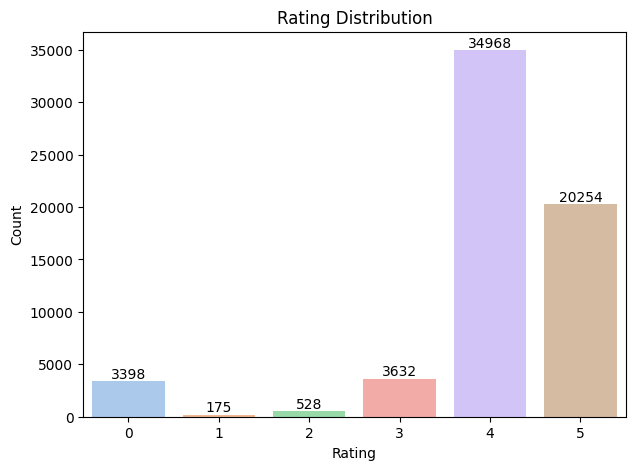

In [71]:
def rating_distribution(data, feature):
  data.loc[:,'rating'] = data[feature].round().astype(int)

  plt.figure(figsize=(7,5))
  graph = sns.countplot(x='rating', data=data, width=0.8, palette='pastel', hue='rating', legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.title('Rating Distribution')
  plt.xlabel('Rating')
  plt.ylabel('Count')

  plt.show()

rating_distribution(course_trim_outliers, 'avg_rating')

In [89]:
def datetime_convert(data, features):
  data = data.copy()
  latest_date = '2022-10-10'
  latest_date = pd.to_datetime(latest_date, format='%Y-%m-%d').tz_localize(None)

  for col in features:
      data[col] = pd.to_datetime(data[col]).dt.tz_localize(None)

  data['published_year'] = data['published_time'].dt.year
  data['published_month'] = data['published_time'].dt.month_name()

  group_year = pd.pivot_table(data, index='published_year',
                               values=['id','num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'],
                               aggfunc={'id': len,
                                        'num_subscribers': 'sum',
                                        'num_reviews':'sum',
                                        'num_comments':'sum',
                                        'num_lectures':'sum'})

  data['published_days_ago'] = (latest_date - data['published_time']).dt.days
  data['updated_days_ago'] = (latest_date - data['last_update_date']).dt.days

  return {1: data,
          2: group_year}

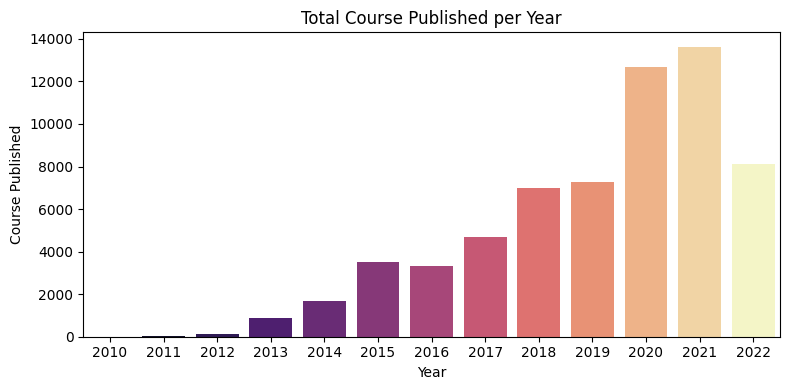

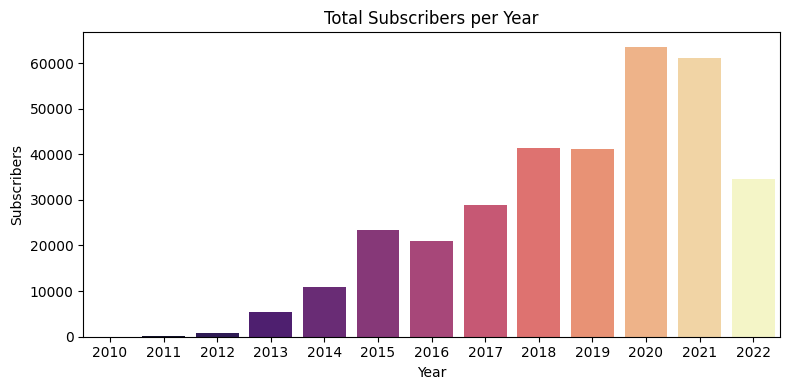

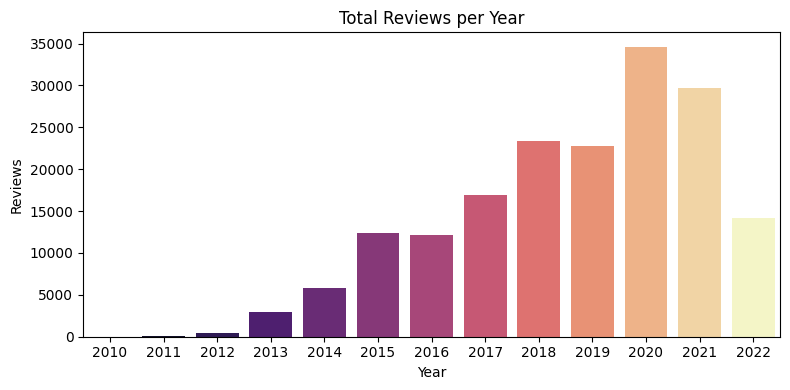

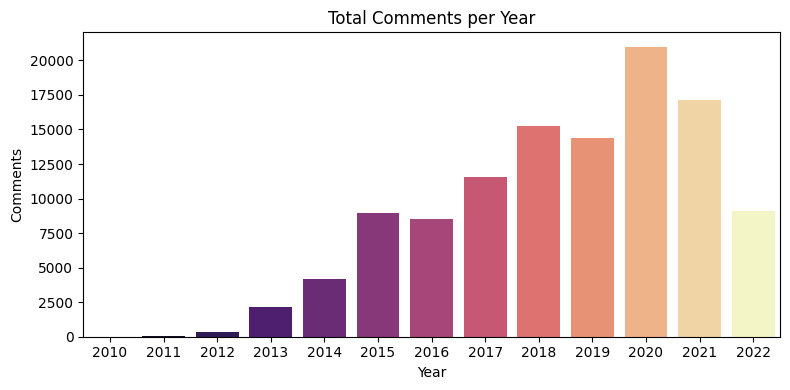

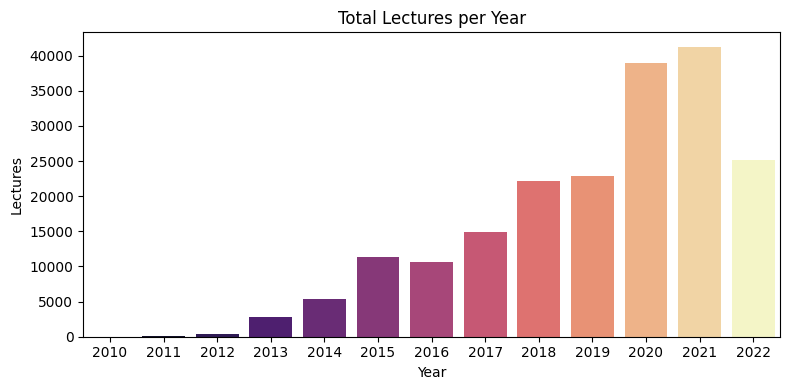

In [90]:
def annual_check(pivot):
  resource = {'id': 'Course Published',
              'num_subscribers': 'Subscribers',
              'num_reviews': 'Reviews',
              'num_comments':'Comments',
              'num_lectures': 'Lectures'}

  for key, val in resource.items():
    plt.figure(figsize=(8,4))
    sns.barplot(data=pivot,
                hue=pivot.index,
                x=pivot.index,
                y=pivot[key],
                palette='magma',
                legend=False)
    plt.title(f'Total {val} per Year')
    plt.xlabel('Year')
    plt.ylabel(val)

    plt.tight_layout()
    plt.show()

annual_check(datetime_convert(course_trim_outliers, ['published_time', 'last_update_date'])[2])

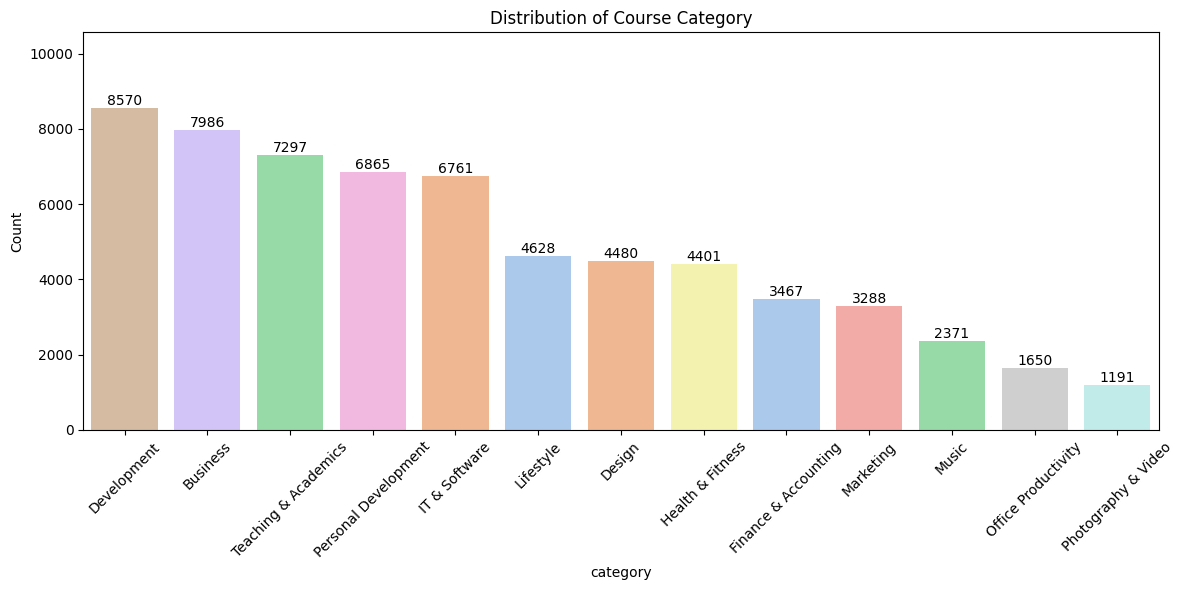

In [91]:
def category_check(data, feature):
  plt.figure(figsize=(12,6))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.ylim(0, max(data[feature].value_counts() + 2000))
  plt.ylabel('Count')
  plt.title('Distribution of Course Category')

  plt.tight_layout()
  plt.show()

category_check(course_trim_outliers, 'category')

In [92]:
def treemap(data, feature, target):
    fig = px.treemap(
        data,
        path=[feature, target],
        values=[1]*len(data))

    fig.update_traces(
        texttemplate='%{label}<br>%{value} (%{percentParent:.2%})',
        textposition="middle center")

    fig.show()

treemap(course_trim_outliers, 'category', 'subcategory')

Topics with more than 500 use
+---------+---------+
| topic   |   count |
+=========+=========+
| Python  |     525 |
+---------+---------+


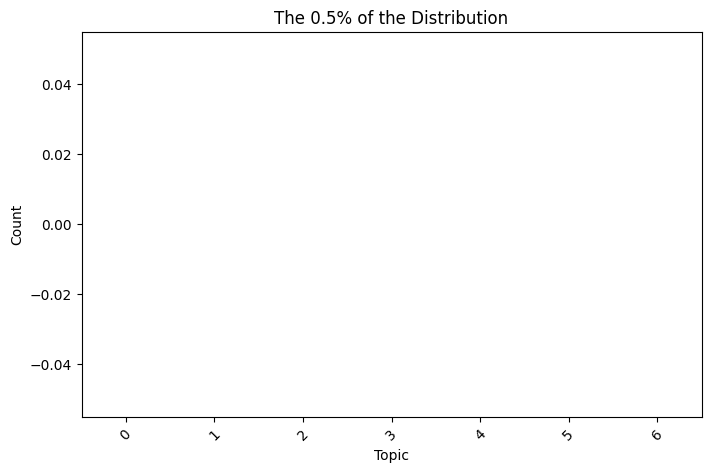

In [118]:
def topic_check(data, feature):
  topics = data[feature].value_counts()
  topics = topics[topics > 500]
  print("Topics with more than 500 use")
  print(topics.to_markdown(tablefmt='outline'))

  topics_count = data[feature].value_counts(normalize=True)
  significant_topic = topics_count[topics_count > 0.005].index
  grouped_topic = data[feature].apply(lambda n: n if n in significant_topic else 'Other')

  plt.figure(figsize=(8,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=significant_topic,
                        hue=feature,
                        legend=False)

  for i in graph.containers:
    plt.bar_label(i, label_type='edge')

  plt.title('The 0.5% of the Distribution')
  plt.xlabel('Topic')
  plt.ylabel('Count')

  plt.xticks(rotation=45)

  plt.show()

topic_check(course_trim_outliers, 'topic')

In [ ]:
def revenue_check(data):
  data = data.copy()
  data.loc[:,'revenue'] = data['price'] * data['num_subscribers']
  data.sort_values(by='revenue', ascending=False, inplace=True)

  leaderboard = data.groupby('instructor_name')['revenue'].sum().sort_values(ascending=False)

  summary = pd.DataFrame({
      'Instructor': leaderboard.index,
      'Revenue': leaderboard.values,
      'Total Course Published': data['instructor_name'].value_counts().sort_values(ascending=False).values,
      'Teaching Duration': data.groupby('instructor_name')['content_length_min'].sum().sort_values(ascending=False).values
  })


  return summary

revenue_check(course_dropna)

In [ ]:
course.info()

In [ ]:
def features_type_separation(data):
  semantics = ['title', 'headline']
  nominal = ['is_paid', 'category', 'subcategory', 'topic' ,'instructor_name']
  ordinal = 'avg_rating'
  datetime = ['published_time', 'last_update_date']

  return {'semantic': semantics,
          'nominal': nominal,
          'ordinal': ordinal,
          'numeric': numerical,
          'datetime': datetime}

types = features_type_separation(course_dropna)

In [ ]:
def categorical_preprocessing(data, features):
  data = data[features].copy()
  payment = data['is_paid'].map({True: 1, False: 0})
  category = pd.get_dummies(data['category'], prefix='category', dtype=int)
  subcategory = pd.get_dummies(data['subcategory'], prefix='sub_category', dtype=int)
  topic = pd.get_dummies(data['topic'], prefix='topic', dtype=int)
  instructor = pd.get_dummies(data['instructor_name'], dtype=int)

  combined =  pd.concat([payment, category, subcategory, topic, instructor], axis=1) #46K+ columns

categorical_preprocessing(course_dropna, types['nominal'])

In [ ]:
def semantic_preprocessing(data, features):
  data = data[features].copy()

  return data

semantic_preprocessing(course_dropna, types['semantic'])

In [ ]:
def numeric_preprocessing(data, features):
  cleansed = np.log1p(data[features])

  return cleansed

numeric_preprocessing(course_dropna, types['numeric'])

In [ ]:
def datetime_preprocessing(data, features):
  data = data[features].copy()

  return data

datetime_preprocessing(course_dropna, types['datetime'])